In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2024-11-19 01:06:09.184138: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-19 01:06:09.200878: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731953169.212673  115777 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731953169.216348  115777 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-19 01:06:09.227180: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Reshape the data to (num_samples, height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [4]:
y_test[3]

0

In [5]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

I0000 00:00:1731953181.269440  115777 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5


I0000 00:00:1731953243.309888  117274 service.cc:148] XLA service 0x7f415c00b110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731953243.309931  117274 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-11-19 01:07:23.325925: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
E0000 00:00:1731953243.414243  117274 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1731953243.424238  117274 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but s

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_115777/2915748518.py", line 1, in <module>

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/nkietwee/.cache/pypoetry/virtualenvs/master-degree-NMpj3oWN-py3.10/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_1624]

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9869 - loss: 0.0432
Test accuracy: 0.9902


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted class for the first test image: 7


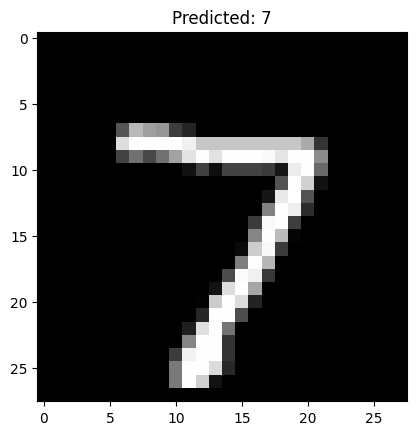

In [16]:
predictions = model.predict(x_test)

# To predict the class of the first test sample
predicted_class = np.argmax(predictions[0])
print(f"Predicted class for the first test image: {predicted_class}")

# Visualize the first test image and its predicted class
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {predicted_class}')
plt.show()
